# Aprendizado de IA (Inteligência Artificial)


#### Este Jupyter Notebook tem a finalidade de servir como ferramenta pedagógica para o aprendizado de Inteligência Artificial.

# --------------------------------------------------------------------------

### Nível 1 - Atividade 1
##### ● Criar perfis diários sobre a demanda energética utilizando como variável principal a POTÊNCIA (W);
##### ● Gerar previsão inicial com RNA (Redes Neurais Artificiais);
##### ● Aplicar essa previsão inicial na técnica Monte Carlo Dropout;
##### ● Analisar o que foi obtido dessas atividades.

# --------------------------------------------------------------------------

#### Criando perfis diários

In [1]:
## Importando as bibliotecas necessárias

import pandas as pd 
import numpy as np 
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


In [60]:
## Tratando os dados

data = pd.read_csv('Database/Dados_JPS_12B1.csv', sep=';', decimal=',')
data.dropna(axis=1, inplace=True)
data.rename(columns={"JPS_12B1":"Power"}, inplace=True)

data["Date"] = data[['DIA', 'MES', "ANO", "HORA", "MINUTO"]].apply(lambda x : datetime(year=x[2],month=x[1],day=x[0],hour=x[3],minute=x[4]), axis=1)
data = data[['Date', 'Power', 'DIA', 'MES', "ANO", "HORA", "MINUTO"]]
data['Day'] = data['Date'].dt.strftime('%A')

data.drop(['DIA', 'MES', "ANO", "HORA", "MINUTO"], inplace=True, axis=1)
data


,Date,Power,Day
0,2008-01-01 00:00:00,7.9,Tuesday
1,2008-01-01 00:15:00,7.7,Tuesday
2,2008-01-01 00:30:00,7.7,Tuesday
3,2008-01-01 00:45:00,7.4,Tuesday
4,2008-01-01 01:00:00,7.4,Tuesday
...,...,...,...
210427,2013-12-31 22:45:00,9.6,Tuesday
210428,2013-12-31 23:00:00,9.6,Tuesday
210429,2013-12-31 23:15:00,9.3,Tuesday
210430,2013-12-31 23:30:00,9.2,Tuesday


In [61]:
## Criando o dataframe com a energia horária

def power_to_energy(power):
    energy = power * (1/4)
    return energy

data_hourly = data
data_hourly.drop(['Day'], inplace=True, axis=1)
data_hourly = data_hourly.set_index('Date')
data_hourly = data_hourly.resample('H').apply(power_to_energy)
data_hourly_mean = data_hourly.resample('H').mean()
data_hourly = data_hourly.resample('H').sum()

data_hourly = data_hourly.rename(columns={"Power": "Energy"})
data_hourly_mean = data_hourly_mean.rename(columns={"Power": "Energy"})
data_hourly

,Energy
Date,
2008-01-01 00:00:00,7.675
2008-01-01 01:00:00,7.350
2008-01-01 02:00:00,7.275
2008-01-01 03:00:00,7.100
2008-01-01 04:00:00,6.975
...,...
2013-12-31 19:00:00,11.250
2013-12-31 20:00:00,11.100
2013-12-31 21:00:00,10.650


In [4]:
trace1 = go.Scatter(x = data_hourly.index[0:24], # eixo x = meses da lista 'date
                    y = data_hourly['Energy'][504:528], # eixo y = temperatura máxima
                    mode = 'markers+lines', # tipo do gráfico: marcadorms em linhas
                    name = 'Energia por hora') # legenda do objeto trace: T.MAX_INMET
    
# cria uma lista com os trace's
data = [trace1]

# cria um objeto layout para por em um gráfico
# objeto layout: informar o que está sendo apresentado no gráfico, no caso abaixo, no eixo y é a 'Temperatura °C'
# no eixo x é informado que fica vazio, com o título do gráfico em caixa alta - comando .upper()
# alterando as características da fonte e cor de cada trace do gráfico
layout = go.Layout(title="Teste",yaxis={'title':'Energia'},xaxis={'title': 'Hora'}, 
                    font = {'family': 'Rockwell','size': 16,'color': 'black'},
                    colorway = ['#FF0000', '#00FF7F','#006400', '#000080', '#B22222', '#00BFFF'])

# cria um gráfico através do objeto figure com os dados da lista com os traces e o layout acima
fig = go.Figure(data=data, layout=layout)

# atualiza o gráfico, objeto figure, informando uma alteração no layout, esta alteração muda o range do eixo X,
# o formato de como será exibido esses dados do eixo X, o tema ,a legenda e o título do gráfico.
# seleciona o mode hovermode.
fig.update_layout(xaxis_tickformat = '%H:%M',
                    template = 'plotly_white',
                    legend_title="",
                    legend_orientation="h",
                    legend={
                        'x': 0.05,
                        'y': -0.25,
                    },
                    title={
                        'text': "Figura 1 - Energia horária acumulada para o dia 22/01/2008",
                        'y':0.93,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top'},
                    hovermode=("x unified"))
fig.update_yaxes(ticksuffix=" Wh") 
fig.update_xaxes(ticksuffix="")                     # selecionando um sufixo para os dados no eixo Y

# comando utilizado para adicionar uma imagem ao gráfico
fig.add_layout_image(
    dict(
        source="https://raw.githubusercontent.com/LinconRozendo/Imagens_u/master/Multi%20Mapa/cear.png",
        xref="paper", yref="paper",
        x=1.05, y=1.1,
        sizex=0.2, sizey=0.2,
        xanchor="right", yanchor="bottom"
        )
    )
    
# retorna a exibição do gráfico criado
fig.show()

In [62]:
data_daily      = data_hourly.resample('D').sum()
data_daily_mean = data_hourly.resample('D').mean()
data_daily

,Energy
Date,
2008-01-01,168.225000
2008-01-02,235.337500
2008-01-03,243.062499
2008-01-04,240.550001
2008-01-05,194.550000
...,...
2013-12-27,308.500000
2013-12-28,253.749998
2013-12-29,233.474999


In [6]:
trace1 = go.Scatter(x = data_daily.index, # eixo x = meses da lista 'date
                    y = data_daily['Energy'], # eixo y = temperatura máxima
                    mode = 'markers+lines', # tipo do gráfico: marcadorms em linhas
                    name = 'Energia por dia') # legenda do objeto trace: T.MAX_INMET
    
# cria uma lista com os trace's
data = [trace1]

# cria um objeto layout para por em um gráfico
# objeto layout: informar o que está sendo apresentado no gráfico, no caso abaixo, no eixo y é a 'Temperatura °C'
# no eixo x é informado que fica vazio, com o título do gráfico em caixa alta - comando .upper()
# alterando as características da fonte e cor de cada trace do gráfico
layout = go.Layout(title="Teste",yaxis={'title':'Energia'},xaxis={'title': ''}, 
                    font = {'family': 'Rockwell','size': 16,'color': 'black'},
                    colorway = ['#006400', '#000080', '#00BFFF', '#B22222', '#00FF7F', '#FF0000' ])

# cria um gráfico através do objeto figure com os dados da lista com os traces e o layout acima
fig = go.Figure(data=data, layout=layout)

# atualiza o gráfico, objeto figure, informando uma alteração no layout, esta alteração muda o range do eixo X,
# o formato de como será exibido esses dados do eixo X, o tema ,a legenda e o título do gráfico.
# seleciona o mode hovermode.
fig.update_layout(xaxis_tickformat = '%x',
                    template = 'plotly_white',
                    legend_title="",
                    legend_orientation="h",
                    legend={
                        'x': 0.05,
                        'y': -0.25,
                    },
                    title={
                        'text': "Figura 2 - Energia diária acumulada entre 2008 e 2013",
                        'y':0.93,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top'},
                    hovermode=("x unified"))
fig.update_yaxes(ticksuffix=" Wh") 
fig.update_xaxes(ticksuffix="")                     # selecionando um sufixo para os dados no eixo Y

# comando utilizado para adicionar uma imagem ao gráfico
fig.add_layout_image(
    dict(
        source="https://raw.githubusercontent.com/LinconRozendo/Imagens_u/master/Multi%20Mapa/cear.png",
        xref="paper", yref="paper",
        x=1.05, y=1.1,
        sizex=0.2, sizey=0.2,
        xanchor="right", yanchor="bottom"
        )
    )
    
# retorna a exibição do gráfico criado
fig.show(config={'scrollZoom': True})

In [7]:
trace1 = go.Scatter(x = data_daily_mean.index, # eixo x = meses da lista 'date
                    y = data_daily_mean['Energy'], # eixo y = temperatura máxima
                    mode = 'markers+lines', # tipo do gráfico: marcadorms em linhas
                    name = 'Energia por dia') # legenda do objeto trace: T.MAX_INMET
    
# cria uma lista com os trace's
data = [trace1]

# cria um objeto layout para por em um gráfico
# objeto layout: informar o que está sendo apresentado no gráfico, no caso abaixo, no eixo y é a 'Temperatura °C'
# no eixo x é informado que fica vazio, com o título do gráfico em caixa alta - comando .upper()
# alterando as características da fonte e cor de cada trace do gráfico
layout = go.Layout(title="Teste",yaxis={'title':'Energia'},xaxis={'title': ''}, 
                    font = {'family': 'Rockwell','size': 16,'color': 'black'},
                    colorway = ['#006400', '#000080', '#00BFFF', '#B22222', '#00FF7F', '#FF0000' ])

# cria um gráfico através do objeto figure com os dados da lista com os traces e o layout acima
fig = go.Figure(data=data, layout=layout)

# atualiza o gráfico, objeto figure, informando uma alteração no layout, esta alteração muda o range do eixo X,
# o formato de como será exibido esses dados do eixo X, o tema ,a legenda e o título do gráfico.
# seleciona o mode hovermode.
fig.update_layout(xaxis_tickformat = '%x',
                    template = 'plotly_white',
                    legend_title="",
                    legend_orientation="h",
                    legend={
                        'x': 0.05,
                        'y': -0.25,
                    },
                    title={
                        'text': "Figura 2.1 - Energia média horária entre 2008 e 2013",
                        'y':0.93,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top'},
                    hovermode=("x unified"))
fig.update_yaxes(ticksuffix=" Wh") 
fig.update_xaxes(ticksuffix="")                     # selecionando um sufixo para os dados no eixo Y

# comando utilizado para adicionar uma imagem ao gráfico
fig.add_layout_image(
    dict(
        source="https://raw.githubusercontent.com/LinconRozendo/Imagens_u/master/Multi%20Mapa/cear.png",
        xref="paper", yref="paper",
        x=1.05, y=1.1,
        sizex=0.2, sizey=0.2,
        xanchor="right", yanchor="bottom"
        )
    )
    
# retorna a exibição do gráfico criado
fig.show(config={'scrollZoom': True})

In [8]:
trace1 = go.Scatter(x = data_daily.index[0:366], # eixo x = meses da lista 'date
                    y = data_daily['Energy'][0:366], # eixo y = temperatura máxima
                    mode = 'markers+lines', # tipo do gráfico: marcadorms em linhas
                    name = 'Energia por dia') # legenda do objeto trace: T.MAX_INMET
    
# cria uma lista com os trace's
data = [trace1]

# cria um objeto layout para por em um gráfico
# objeto layout: informar o que está sendo apresentado no gráfico, no caso abaixo, no eixo y é a 'Temperatura °C'
# no eixo x é informado que fica vazio, com o título do gráfico em caixa alta - comando .upper()
# alterando as características da fonte e cor de cada trace do gráfico
layout = go.Layout(title="Teste",yaxis={'title':'Energia'},xaxis={'title': ''}, 
                    font = {'family': 'Rockwell','size': 16,'color': 'black'},
                    colorway = ['#006400', '#000080', '#00BFFF', '#B22222', '#00FF7F', '#FF0000' ])

# cria um gráfico através do objeto figure com os dados da lista com os traces e o layout acima
fig = go.Figure(data=data, layout=layout)

# atualiza o gráfico, objeto figure, informando uma alteração no layout, esta alteração muda o range do eixo X,
# o formato de como será exibido esses dados do eixo X, o tema ,a legenda e o título do gráfico.
# seleciona o mode hovermode.
fig.update_layout(xaxis_tickformat = '%x',
                    template = 'plotly_white',
                    legend_title="",
                    legend_orientation="h",
                    legend={
                        'x': 0.05,
                        'y': -0.25,
                    },
                    title={
                        'text': "Figura 3 - Energia diária acumulada do ano 2008",
                        'y':0.93,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top'},
                    hovermode=("x unified"))
fig.update_yaxes(ticksuffix=" Wh") 
fig.update_xaxes(ticksuffix="")                     # selecionando um sufixo para os dados no eixo Y

# comando utilizado para adicionar uma imagem ao gráfico
fig.add_layout_image(
    dict(
        source="https://raw.githubusercontent.com/LinconRozendo/Imagens_u/master/Multi%20Mapa/cear.png",
        xref="paper", yref="paper",
        x=1.05, y=1.1,
        sizex=0.2, sizey=0.2,
        xanchor="right", yanchor="bottom"
        )
    )
    
# retorna a exibição do gráfico criado
fig.show()

In [9]:
trace1 = go.Scatter(x = data_daily_mean.index[0:366], # eixo x = meses da lista 'date
                    y = data_daily_mean['Energy'][0:366], # eixo y = temperatura máxima
                    mode = 'markers+lines', # tipo do gráfico: marcadorms em linhas
                    name = 'Energia por dia') # legenda do objeto trace: T.MAX_INMET
    
# cria uma lista com os trace's
data = [trace1]

# cria um objeto layout para por em um gráfico
# objeto layout: informar o que está sendo apresentado no gráfico, no caso abaixo, no eixo y é a 'Temperatura °C'
# no eixo x é informado que fica vazio, com o título do gráfico em caixa alta - comando .upper()
# alterando as características da fonte e cor de cada trace do gráfico
layout = go.Layout(title="Teste",yaxis={'title':'Energia'},xaxis={'title': ''}, 
                    font = {'family': 'Rockwell','size': 16,'color': 'black'},
                    colorway = ['#006400', '#000080', '#00BFFF', '#B22222', '#00FF7F', '#FF0000' ])

# cria um gráfico através do objeto figure com os dados da lista com os traces e o layout acima
fig = go.Figure(data=data, layout=layout)

# atualiza o gráfico, objeto figure, informando uma alteração no layout, esta alteração muda o range do eixo X,
# o formato de como será exibido esses dados do eixo X, o tema ,a legenda e o título do gráfico.
# seleciona o mode hovermode.
fig.update_layout(xaxis_tickformat = '%x',
                    template = 'plotly_white',
                    legend_title="",
                    legend_orientation="h",
                    legend={
                        'x': 0.05,
                        'y': -0.25,
                    },
                    title={
                        'text': "Figura 3.1 - Energia média horária do ano 2008",
                        'y':0.93,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top'},
                    hovermode=("x unified"))
fig.update_yaxes(ticksuffix=" Wh") 
fig.update_xaxes(ticksuffix="")                     # selecionando um sufixo para os dados no eixo Y

# comando utilizado para adicionar uma imagem ao gráfico
fig.add_layout_image(
    dict(
        source="https://raw.githubusercontent.com/LinconRozendo/Imagens_u/master/Multi%20Mapa/cear.png",
        xref="paper", yref="paper",
        x=1.05, y=1.1,
        sizex=0.2, sizey=0.2,
        xanchor="right", yanchor="bottom"
        )
    )
    
# retorna a exibição do gráfico criado
fig.show()

In [63]:
data_monthly      = data_daily.resample('MS').sum()
data_monthly_mean = data_daily.resample('MS').mean()
data_monthly

,Energy
Date,
2008-01-01,7224.668748
2008-02-01,6972.681251
2008-03-01,8014.937495
2008-04-01,7096.000003
2008-05-01,6965.775001
...,...
2013-08-01,8441.515002
2013-09-01,8562.856259
2013-10-01,9221.456250


In [11]:
trace1 = go.Scatter(x = data_monthly.index, # eixo x = meses da lista 'date
                    y = data_monthly['Energy'], # eixo y = temperatura máxima
                    mode = 'markers+lines', # tipo do gráfico: marcadorms em linhas
                    name = 'Energia por mês') # legenda do objeto trace: T.MAX_INMET
    
# cria uma lista com os trace's
data = [trace1]

# cria um objeto layout para por em um gráfico
# objeto layout: informar o que está sendo apresentado no gráfico, no caso abaixo, no eixo y é a 'Temperatura °C'
# no eixo x é informado que fica vazio, com o título do gráfico em caixa alta - comando .upper()
# alterando as características da fonte e cor de cada trace do gráfico
layout = go.Layout(title="Teste",yaxis={'title':'Energia'},xaxis={'title': ''}, 
                    font = {'family': 'Rockwell','size': 16,'color': 'black'},
                    colorway = ['#000080', '#006400', '#00BFFF', '#B22222', '#00FF7F', '#FF0000' ])

# cria um gráfico através do objeto figure com os dados da lista com os traces e o layout acima
fig = go.Figure(data=data, layout=layout)

# atualiza o gráfico, objeto figure, informando uma alteração no layout, esta alteração muda o range do eixo X,
# o formato de como será exibido esses dados do eixo X, o tema ,a legenda e o título do gráfico.
# seleciona o mode hovermode.
fig.update_layout(xaxis_tickformat = '%B/%Y',
                    template = 'plotly_white',
                    legend_title="",
                    legend_orientation="h",
                    legend={
                        'x': 0.05,
                        'y': -0.25,
                    },
                    title={
                        'text': "Figura 4 - Energia mensal acumulada entre 2008 e 2013",
                        'y':0.93,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top'},
                    hovermode=("x unified"))
fig.update_yaxes(ticksuffix=" Wh") 
fig.update_xaxes(ticksuffix=" ")                     # selecionando um sufixo para os dados no eixo Y

# comando utilizado para adicionar uma imagem ao gráfico
fig.add_layout_image(
    dict(
        source="https://raw.githubusercontent.com/LinconRozendo/Imagens_u/master/Multi%20Mapa/cear.png",
        xref="paper", yref="paper",
        x=1.05, y=1.1,
        sizex=0.2, sizey=0.2,
        xanchor="right", yanchor="bottom"
        )
    )
    
# retorna a exibição do gráfico criado
fig.show()

In [12]:
trace1 = go.Scatter(x = data_monthly_mean.index, # eixo x = meses da lista 'date
                    y = data_monthly_mean['Energy'], # eixo y = temperatura máxima
                    mode = 'markers+lines', # tipo do gráfico: marcadorms em linhas
                    name = 'Energia por mês') # legenda do objeto trace: T.MAX_INMET
    
# cria uma lista com os trace's
data = [trace1]

# cria um objeto layout para por em um gráfico
# objeto layout: informar o que está sendo apresentado no gráfico, no caso abaixo, no eixo y é a 'Temperatura °C'
# no eixo x é informado que fica vazio, com o título do gráfico em caixa alta - comando .upper()
# alterando as características da fonte e cor de cada trace do gráfico
layout = go.Layout(title="Teste",yaxis={'title':'Energia'},xaxis={'title': ''}, 
                    font = {'family': 'Rockwell','size': 16,'color': 'black'},
                    colorway = ['#000080', '#006400', '#00BFFF', '#B22222', '#00FF7F', '#FF0000' ])

# cria um gráfico através do objeto figure com os dados da lista com os traces e o layout acima
fig = go.Figure(data=data, layout=layout)

# atualiza o gráfico, objeto figure, informando uma alteração no layout, esta alteração muda o range do eixo X,
# o formato de como será exibido esses dados do eixo X, o tema ,a legenda e o título do gráfico.
# seleciona o mode hovermode.
fig.update_layout(xaxis_tickformat = '%B/%Y',
                    template = 'plotly_white',
                    legend_title="",
                    legend_orientation="h",
                    legend={
                        'x': 0.05,
                        'y': -0.25,
                    },
                    title={
                        'text': "Figura 4.1 - Energia média diária entre 2008 e 2013",
                        'y':0.93,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top'},
                    hovermode=("x unified"))
fig.update_yaxes(ticksuffix=" Wh") 
fig.update_xaxes(ticksuffix="")                     # selecionando um sufixo para os dados no eixo Y

# comando utilizado para adicionar uma imagem ao gráfico
fig.add_layout_image(
    dict(
        source="https://raw.githubusercontent.com/LinconRozendo/Imagens_u/master/Multi%20Mapa/cear.png",
        xref="paper", yref="paper",
        x=1.05, y=1.1,
        sizex=0.2, sizey=0.2,
        xanchor="right", yanchor="bottom"
        )
    )
    
# retorna a exibição do gráfico criado
fig.show()

In [64]:
data_yearly      = data_monthly.resample('A').sum()
data_yearly_mean = data_monthly.resample('A').mean()
data_yearly

,Energy
Date,
2008-12-31,82993.306278
2009-12-31,100881.925012
2010-12-31,117220.078072
2011-12-31,117977.950007
2012-12-31,117584.240575
2013-12-31,110276.665031


In [14]:
trace1 = go.Scatter(x = data_yearly.index, # eixo x = meses da lista 'date
                    y = data_yearly['Energy'], # eixo y = temperatura máxima
                    mode = 'markers+lines', # tipo do gráfico: marcadorms em linhas
                    name = 'Energia por ano') # legenda do objeto trace: T.MAX_INMET
    
# cria uma lista com os trace's
data = [trace1]

# cria um objeto layout para por em um gráfico
# objeto layout: informar o que está sendo apresentado no gráfico, no caso abaixo, no eixo y é a 'Temperatura °C'
# no eixo x é informado que fica vazio, com o título do gráfico em caixa alta - comando .upper()
# alterando as características da fonte e cor de cada trace do gráfico
layout = go.Layout(title="Teste",yaxis={'title':'Energia'},xaxis={'title': ''}, 
                    font = {'family': 'Rockwell','size': 16,'color': 'black'},
                    colorway = ['#B22222', '#00FF7F', '#000080', '#006400', '#00BFFF', '#FF0000' ])

# cria um gráfico através do objeto figure com os dados da lista com os traces e o layout acima
fig = go.Figure(data=data, layout=layout)

# atualiza o gráfico, objeto figure, informando uma alteração no layout, esta alteração muda o range do eixo X,
# o formato de como será exibido esses dados do eixo X, o tema ,a legenda e o título do gráfico.
# seleciona o mode hovermode.
fig.update_layout(xaxis_tickformat = '%Y',
                    template = 'plotly_white',
                    legend_title="",
                    legend_orientation="h",
                    legend={
                        'x': 0.05,
                        'y': -0.25,
                    },
                    title={
                        'text': "Figura 5 - Energia anual acumulada entre 2008 e 2013",
                        'y':0.93,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top'},
                    hovermode=("x unified"))
fig.update_yaxes(ticksuffix=" Wh") 
fig.update_xaxes(ticksuffix="")                     # selecionando um sufixo para os dados no eixo Y

# comando utilizado para adicionar uma imagem ao gráfico
fig.add_layout_image(
    dict(
        source="https://raw.githubusercontent.com/LinconRozendo/Imagens_u/master/Multi%20Mapa/cear.png",
        xref="paper", yref="paper",
        x=1.05, y=1.1,
        sizex=0.2, sizey=0.2,
        xanchor="right", yanchor="bottom"
        )
    )
    
# retorna a exibição do gráfico criado
fig.show()

In [15]:
trace1 = go.Scatter(x = data_yearly_mean.index, # eixo x = meses da lista 'date
                    y = data_yearly_mean['Energy'], # eixo y = temperatura máxima
                    mode = 'markers+lines', # tipo do gráfico: marcadorms em linhas
                    name = 'Energia por ano') # legenda do objeto trace: T.MAX_INMET
    
# cria uma lista com os trace's
data_trace = [trace1]

# cria um objeto layout para por em um gráfico
# objeto layout: informar o que está sendo apresentado no gráfico, no caso abaixo, no eixo y é a 'Temperatura °C'
# no eixo x é informado que fica vazio, com o título do gráfico em caixa alta - comando .upper()
# alterando as características da fonte e cor de cada trace do gráfico
layout = go.Layout(title="Teste",yaxis={'title':'Energia'},xaxis={'title': ''}, 
                    font = {'family': 'Rockwell','size': 16,'color': 'black'},
                    colorway = ['#B22222', '#00FF7F', '#000080', '#006400', '#00BFFF', '#FF0000' ])

# cria um gráfico através do objeto figure com os dados da lista com os traces e o layout acima
fig = go.Figure(data=data_trace, layout=layout)

# atualiza o gráfico, objeto figure, informando uma alteração no layout, esta alteração muda o range do eixo X,
# o formato de como será exibido esses dados do eixo X, o tema ,a legenda e o título do gráfico.
# seleciona o mode hovermode.
fig.update_layout(xaxis_tickformat = '%Y',
                    template = 'plotly_white',
                    legend_title="",
                    legend_orientation="h",
                    legend={
                        'x': 0.05,
                        'y': -0.25,
                    },
                    title={
                        'text': "Figura 5.1 - Energia média mensal entre 2008 e 2013",
                        'y':0.93,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top'},
                    hovermode=("x unified"))
fig.update_yaxes(ticksuffix=" Wh") 
fig.update_xaxes(ticksuffix="")                     # selecionando um sufixo para os dados no eixo Y

# comando utilizado para adicionar uma imagem ao gráfico
fig.add_layout_image(
    dict(
        source="https://raw.githubusercontent.com/LinconRozendo/Imagens_u/master/Multi%20Mapa/cear.png",
        xref="paper", yref="paper",
        x=1.05, y=1.1,
        sizex=0.2, sizey=0.2,
        xanchor="right", yanchor="bottom"
        )
    )
    
# retorna a exibição do gráfico criado
fig.show()

# --------------------------------------------------------------------------

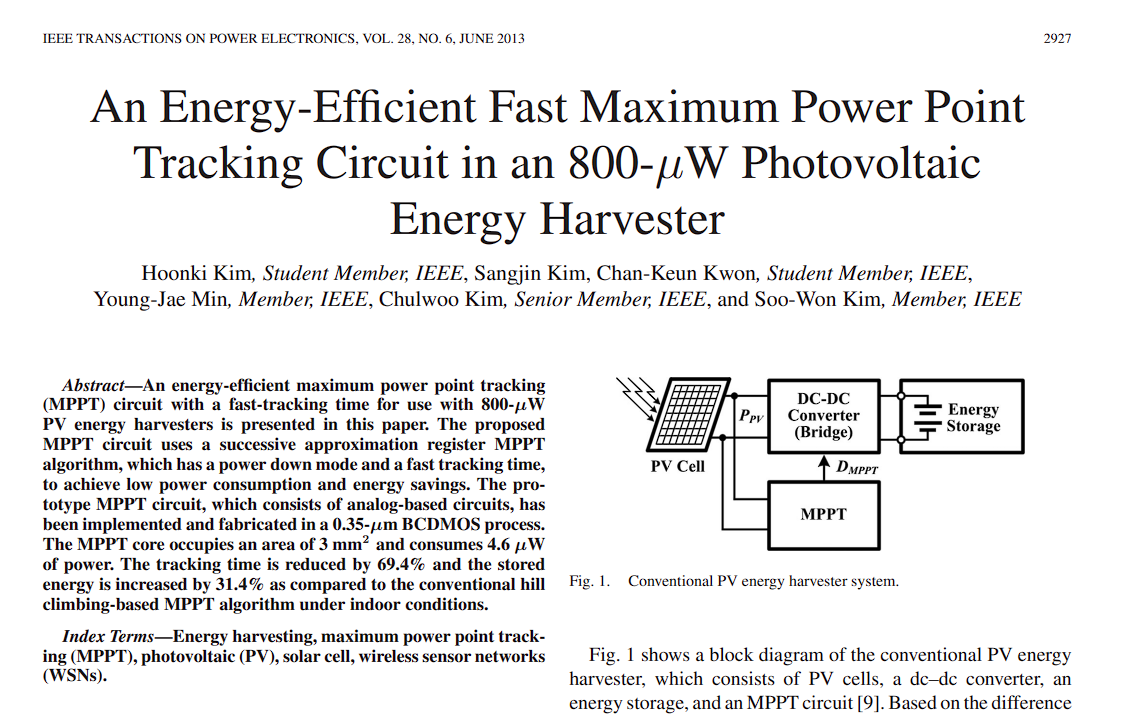

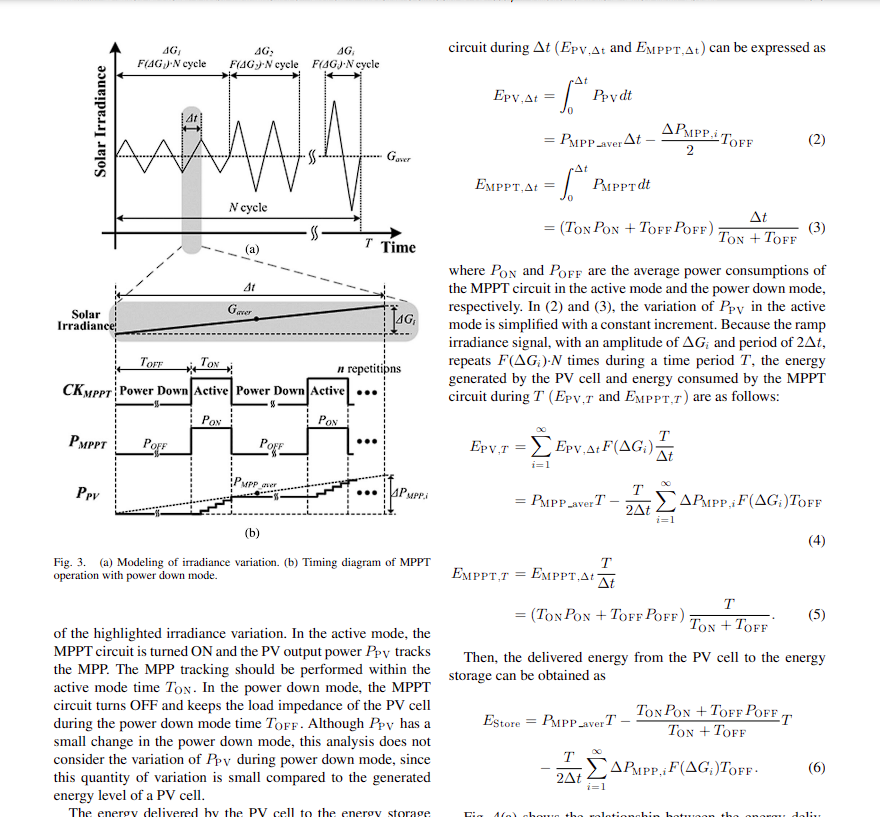

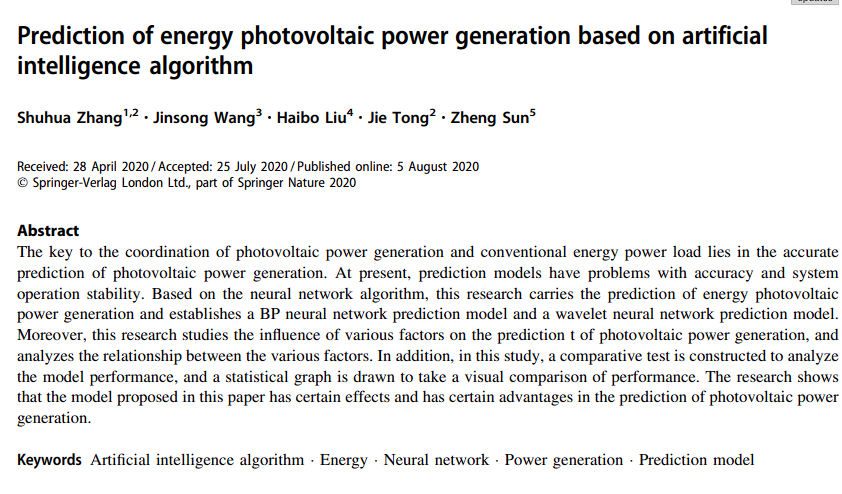

In [16]:
## Criando o dataframe com a média diária

#data_daily = data
#data_daily = data_daily.set_index('Date')
#data_daily = data_daily.resample('D').mean()
#data_daily

In [33]:
## Criando dataframes com a média diária para cada mês até o ano de 2012

## Janeiro
data_daily_jan = data_daily.loc[(data_daily.index.month == 1)]
data_daily_jan_real = data_daily.loc[(data_daily.index.year == 2013) & (data_daily.index.month == 1)]

## Fevereiro 
data_daily_feb = data_daily.loc[(data_daily.index.year < 2013) & (data_daily.index.month == 2)]
data_daily_feb_real = data_daily.loc[(data_daily.index.year == 2013) & (data_daily.index.month == 2)]

## Março
data_daily_mar = data_daily.loc[(data_daily.index.year < 2013) & (data_daily.index.month == 3)]
data_daily_mar_real = data_daily.loc[(data_daily.index.year == 2013) & (data_daily.index.month == 3)]

## Abril
data_daily_apr = data_daily.loc[(data_daily.index.year < 2013) & (data_daily.index.month == 4)]
data_daily_apr_real = data_daily.loc[(data_daily.index.year == 2013) & (data_daily.index.month == 4)]

## Maio
data_daily_may = data_daily.loc[(data_daily.index.year < 2013) & (data_daily.index.month == 5)]
data_daily_may_real = data_daily.loc[(data_daily.index.year == 2013) & (data_daily.index.month == 5)]

## Junho
data_daily_jun = data_daily.loc[(data_daily.index.year < 2013) & (data_daily.index.month == 6)]
data_daily_jun_real = data_daily.loc[(data_daily.index.year == 2013) & (data_daily.index.month == 6)]

## Julho
data_daily_jul = data_daily.loc[(data_daily.index.year < 2013) & (data_daily.index.month == 7)]
data_daily_jul_real = data_daily.loc[(data_daily.index.year == 2013) & (data_daily.index.month == 7)]

## Agosto
data_daily_aug = data_daily.loc[(data_daily.index.year < 2013) & (data_daily.index.month == 8)]
data_daily_aug_real = data_daily.loc[(data_daily.index.year == 2013) & (data_daily.index.month == 8)]

## Setembro 🤸‍♀️🤸‍♂️
data_daily_sep = data_daily.loc[(data_daily.index.year < 2013) & (data_daily.index.month == 9)]
data_daily_sep_real = data_daily.loc[(data_daily.index.year == 2013) & (data_daily.index.month == 9)]

## Outubro
data_daily_oct = data_daily.loc[(data_daily.index.year < 2013) & (data_daily.index.month == 10)]
data_daily_oct_real = data_daily.loc[(data_daily.index.year == 2013) & (data_daily.index.month == 10)]

## November
data_daily_nov = data_daily.loc[(data_daily.index.year < 2013) & (data_daily.index.month == 11)]
data_daily_nov_real = data_daily.loc[(data_daily.index.year == 2013) & (data_daily.index.month == 11)]

## December
data_daily_dec = data_daily.loc[(data_daily.index.year < 2013) & (data_daily.index.month == 12)]
data_daily_dec_real = data_daily.loc[(data_daily.index.year == 2013) & (data_daily.index.month == 12)]


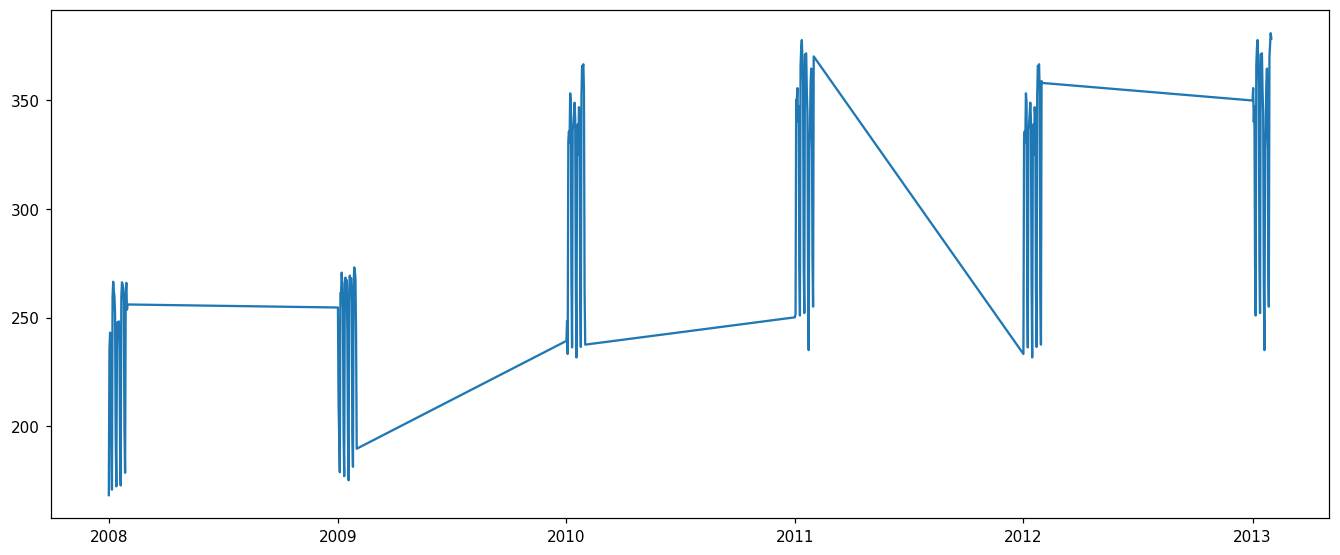

In [36]:
plt.figure(figsize=(15,6),dpi=110)
plt.plot(data_daily_jan)
plt.show()

In [37]:
## Criando os dados de potência para previsão

n_data_tested = 4
n_data_predict = 3 #n_data_predict = (n+1) **O primeiro elemento corresponde ao elemento k**
size_window = n_data_tested + n_data_predict

inputs = np.zeros([len(data_daily_jan) - size_window, n_data_tested])
outputs = np.zeros([len(data_daily_jan) - size_window, n_data_predict])

for i in range(len(data_daily_jan) - size_window):
    inputs[i] = data_daily_jan["Energy"][i: (i + n_data_tested)] 
    outputs[i] = data_daily_jan["Energy"][(i + n_data_tested):(i + size_window)]

In [38]:
inputs_data_jan = pd.DataFrame(inputs, columns=["Energy (k-4)", "Energy (k-3)", "Energy (k-2)", "Energy (k-1)"])
inputs_data_jan

,Energy (k-4),Energy (k-3),Energy (k-2),Energy (k-1)
0,168.225000,235.337500,243.062499,240.550001
1,235.337500,243.062499,240.550001,194.550000
2,243.062499,240.550001,194.550000,170.775000
3,240.550001,194.550000,170.775000,259.724999
4,194.550000,170.775000,259.724999,266.475001
...,...,...,...,...
174,235.000000,327.150002,336.575001,357.649999
175,327.150002,336.575001,357.649999,364.606250
176,336.575001,357.649999,364.606250,352.075003
177,357.649999,364.606250,352.075003,278.624998


In [39]:
outputs_data_jan = pd.DataFrame(outputs, columns=["Energy (k)", "Energy (k+1)", "Energy (k+2)"])
outputs_data_jan

,Energy (k),Energy (k+1),Energy (k+2)
0,194.550000,170.775000,259.724999
1,170.775000,259.724999,266.475001
2,259.724999,266.475001,262.206250
3,266.475001,262.206250,259.775000
4,262.206250,259.775000,251.325001
...,...,...,...
174,364.606250,352.075003,278.624998
175,352.075003,278.624998,254.999999
176,278.624998,254.999999,370.200001
177,254.999999,370.200001,375.750000


In [40]:
database = pd.concat([inputs_data_jan, outputs_data_jan],axis=1)
database

,Energy (k-4),Energy (k-3),Energy (k-2),Energy (k-1),Energy (k),Energy (k+1),Energy (k+2)
0,168.225000,235.337500,243.062499,240.550001,194.550000,170.775000,259.724999
1,235.337500,243.062499,240.550001,194.550000,170.775000,259.724999,266.475001
2,243.062499,240.550001,194.550000,170.775000,259.724999,266.475001,262.206250
3,240.550001,194.550000,170.775000,259.724999,266.475001,262.206250,259.775000
4,194.550000,170.775000,259.724999,266.475001,262.206250,259.775000,251.325001
...,...,...,...,...,...,...,...
174,235.000000,327.150002,336.575001,357.649999,364.606250,352.075003,278.624998
175,327.150002,336.575001,357.649999,364.606250,352.075003,278.624998,254.999999
176,336.575001,357.649999,364.606250,352.075003,278.624998,254.999999,370.200001
177,357.649999,364.606250,352.075003,278.624998,254.999999,370.200001,375.750000


In [23]:
## Importando as bibliotecas necessárias para implementação da RNA

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [41]:
## Criando os dados de treinamento e teste para entrada e saída

data = np.array(database)
data_norm = tf.keras.utils.normalize(data,axis=1)

input_train = data_norm[0:int(0.7 * len(inputs)), 0:5]
input_test = data_norm[int(0.7*len(inputs)) :-1, 0:5] 

output_train = data_norm[0:int(0.7 * len(outputs)), 5:7]
output_test = data_norm[int(0.7 * len(outputs)):-1, 5:7] 


In [42]:
## Convertendo os dados para objetos Tensor 

entrada_train = tf.convert_to_tensor(input_train)
saida_train = tf.convert_to_tensor(output_train)
entrada_test = tf.convert_to_tensor(input_test)
saida_test = tf.convert_to_tensor(output_test)

In [43]:
## Criando camadas para o modelo de teste do tensorflow

model = keras.Sequential([
    keras.Input(5),                                 #shape=(entrada_train.shape[1],)),  # input layer (1)
    keras.layers.Dense(50, activation='sigmoid'),   # hidden layer (1)
    keras.layers.Dense(50, activation='sigmoid'),   # hidden layer (2)
    keras.layers.Dense(2, activation='sigmoid')     # output layer 
])


opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer = opt,
              loss='mse',
              metrics=['accuracy'])

model.summary()

model.fit(entrada_train, saida_train, shuffle=True, epochs=5000)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                300       
                                                                 
 dense_7 (Dense)             (None, 50)                2550      
                                                                 
 dense_8 (Dense)             (None, 2)                 102       
                                                                 
Total params: 2952 (11.53 KB)
Trainable params: 2952 (11.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5000
4/4 [==============================] - 1s 3ms/step - loss: 0.0240 - accuracy: 0.5280
Epoch 2/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0161 - accuracy: 0.4320
Epoch 3/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0050 - accurac

In [44]:
## Verificando a taxa de precisão dos dados obtidos na previsão

test_loss, test_acc = model.evaluate(entrada_test, saida_test, verbose=1) 

print('Test accuracy:', test_acc)

2/2 [==============================] - 0s 5ms/step - loss: 2.0246e-04 - accuracy: 0.8302
Test accuracy: 0.8301886916160583


In [45]:
predictions = model.predict(entrada_test)

trace1 = go.Scatter(x = np.arange(0, len(saida_test)), # eixo x = meses da lista 'date
                    y = predictions[:, 0], # eixo y = temperatura máxima
                    mode = 'markers+lines', # tipo do gráfico: marcadorms em linhas
                    name = 'Dado Estimado') # legenda do objeto trace: T.MAX_INMET

trace2 = go.Scatter(x = np.arange(0, len(saida_test)), # eixo x = meses da lista 'date
                    y = saida_test[:, 0], # eixo y = temperatura máxima
                    mode = 'markers+lines', # tipo do gráfico: marcadorms em linhas
                    name = 'Dado Real') # legenda do objeto trace: T.MAX_INMET

# cria uma lista com os trace's
data_trace = [trace1, trace2]

# cria um objeto layout para por em um gráfico
# objeto layout: informar o que está sendo apresentado no gráfico, no caso abaixo, no eixo y é a 'Temperatura °C'
# no eixo x é informado que fica vazio, com o título do gráfico em caixa alta - comando .upper()
# alterando as características da fonte e cor de cada trace do gráfico
layout = go.Layout(title="Teste",yaxis={'title':'Energia'},xaxis={'title': ''}, 
                    font = {'family': 'Rockwell','size': 16,'color': 'black'},
                    colorway = ['#B22222', '#00FF7F', '#000080', '#006400', '#00BFFF', '#FF0000' ])

# cria um gráfico através do objeto figure com os dados da lista com os traces e o layout acima
fig = go.Figure(data=data_trace, layout=layout)

# atualiza o gráfico, objeto figure, informando uma alteração no layout, esta alteração muda o range do eixo X,
# o formato de como será exibido esses dados do eixo X, o tema ,a legenda e o título do gráfico.
# seleciona o mode hovermode.
fig.update_layout(xaxis_tickformat = '%Y',
                    template = 'plotly_white',
                    legend_title="",
                    legend_orientation="h",
                    legend={
                        'x': 0.05,
                        'y': -0.25,
                    },
                    title={
                        'text': "Figura 6.1 - Comparativo de dados reais e estimados para o mês de Janeiro",
                        'y':0.93,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top'},
                    hovermode=("x unified"))
fig.update_yaxes(ticksuffix=" Wh") 
fig.update_xaxes(ticksuffix="")                     # selecionando um sufixo para os dados no eixo Y

# comando utilizado para adicionar uma imagem ao gráfico
fig.add_layout_image(
    dict(
        source="https://raw.githubusercontent.com/LinconRozendo/Imagens_u/master/Multi%20Mapa/cear.png",
        xref="paper", yref="paper",
        x=1.05, y=1.1,
        sizex=0.2, sizey=0.2,
        xanchor="right", yanchor="bottom"
        )
    )
    
# retorna a exibição do gráfico criado
fig.show()


2/2 [==============================] - 0s 4ms/step


In [68]:
## Criando os dados de potência para previsão de todos os dados diários

n_data_tested = 4
n_data_predict = 3 #n_data_predict = (n+1) **O primeiro elemento corresponde ao elemento k**
size_window = n_data_tested + n_data_predict

inputs = np.zeros([len(data_daily) - size_window, n_data_tested])
outputs = np.zeros([len(data_daily) - size_window, n_data_predict])

for i in range(len(data_daily) - size_window):
    inputs[i] = data_daily["Energy"][i: (i + n_data_tested)] 
    outputs[i] = data_daily["Energy"][(i + n_data_tested):(i + size_window)]

In [69]:
inputs_data = pd.DataFrame(inputs, columns=["Energy (k-4)", "Energy (k-3)", "Energy (k-2)", "Energy (k-1)"])
inputs_data

,Energy (k-4),Energy (k-3),Energy (k-2),Energy (k-1)
0,168.225000,235.337500,243.062499,240.550001
1,235.337500,243.062499,240.550001,194.550000
2,243.062499,240.550001,194.550000,170.775000
3,240.550001,194.550000,170.775000,259.724999
4,194.550000,170.775000,259.724999,266.475001
...,...,...,...,...
2180,302.497831,314.781251,301.437500,402.474999
2181,314.781251,301.437500,402.474999,269.250000
2182,301.437500,402.474999,269.250000,314.975004
2183,402.474999,269.250000,314.975004,307.574999


In [70]:
outputs_data = pd.DataFrame(outputs, columns=["Energy (k)", "Energy (k+1)", "Energy (k+2)"])
outputs_data

,Energy (k),Energy (k+1),Energy (k+2)
0,194.550000,170.775000,259.724999
1,170.775000,259.724999,266.475001
2,259.724999,266.475001,262.206250
3,266.475001,262.206250,259.775000
4,262.206250,259.775000,251.325001
...,...,...,...
2180,269.250000,314.975004,307.574999
2181,314.975004,307.574999,308.500000
2182,307.574999,308.500000,253.749998
2183,308.500000,253.749998,233.474999


In [71]:
database = pd.concat([inputs_data, outputs_data],axis=1)
database

,Energy (k-4),Energy (k-3),Energy (k-2),Energy (k-1),Energy (k),Energy (k+1),Energy (k+2)
0,168.225000,235.337500,243.062499,240.550001,194.550000,170.775000,259.724999
1,235.337500,243.062499,240.550001,194.550000,170.775000,259.724999,266.475001
2,243.062499,240.550001,194.550000,170.775000,259.724999,266.475001,262.206250
3,240.550001,194.550000,170.775000,259.724999,266.475001,262.206250,259.775000
4,194.550000,170.775000,259.724999,266.475001,262.206250,259.775000,251.325001
...,...,...,...,...,...,...,...
2180,302.497831,314.781251,301.437500,402.474999,269.250000,314.975004,307.574999
2181,314.781251,301.437500,402.474999,269.250000,314.975004,307.574999,308.500000
2182,301.437500,402.474999,269.250000,314.975004,307.574999,308.500000,253.749998
2183,402.474999,269.250000,314.975004,307.574999,308.500000,253.749998,233.474999


In [72]:
## Criando os dados de treinamento e teste para entrada e saída

data = np.array(database)
data_norm = tf.keras.utils.normalize(data,axis=1)

input_train = data_norm[0:int(0.7 * len(inputs)), 0:5]
input_test = data_norm[int(0.7*len(inputs)) :-1, 0:5] 

output_train = data_norm[0:int(0.7 * len(outputs)), 5:7]
output_test = data_norm[int(0.7 * len(outputs)):-1, 5:7] 

In [73]:
## Convertendo os dados para objetos Tensor 

entrada_train = tf.convert_to_tensor(input_train)
saida_train = tf.convert_to_tensor(output_train)
entrada_test = tf.convert_to_tensor(input_test)
saida_test = tf.convert_to_tensor(output_test)

In [74]:
## Criando camadas para o modelo de teste do tensorflow

model = keras.Sequential([
    keras.Input(5),                                 #shape=(entrada_train.shape[1],)),  # input layer (1)
    keras.layers.Dense(50, activation='sigmoid'),   # hidden layer (1)
    keras.layers.Dense(50, activation='sigmoid'),   # hidden layer (2)
    keras.layers.Dense(2, activation='sigmoid')     # output layer 
])


opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer = opt,
              loss='mse',
              metrics=['accuracy'])

model.summary()

model.fit(entrada_train, saida_train, shuffle=True, epochs=5000)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 50)                300       
                                                                 
 dense_10 (Dense)            (None, 50)                2550      
                                                                 
 dense_11 (Dense)            (None, 2)                 102       
                                                                 
Total params: 2952 (11.53 KB)
Trainable params: 2952 (11.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5000
48/48 [==============================] - 1s 2ms/step - loss: 0.0160 - accuracy: 0.4807
Epoch 2/5000
48/48 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 0.4820
Epoch 3/5000
48/48 [==============================] - 0s 2ms/step - loss: 0.0031 - a

In [75]:
## Verificando a taxa de precisão dos dados obtidos na previsão

test_loss, test_acc = model.evaluate(entrada_test, saida_test, verbose=1) 

print('Test accuracy:', test_acc)

21/21 [==============================] - 0s 3ms/step - loss: 3.0584e-04 - accuracy: 0.7939
Test accuracy: 0.7938931584358215


In [81]:
predictions = model.predict(entrada_test)

trace1 = go.Scatter(x = np.arange(0, len(saida_test)), # eixo x = meses da lista 'date
                    y = predictions[:, 0], # eixo y = temperatura máxima
                    mode = 'markers+lines', # tipo do gráfico: marcadorms em linhas
                    name = 'Dado Estimado') # legenda do objeto trace: T.MAX_INMET

trace2 = go.Scatter(x = np.arange(0, len(saida_test)), # eixo x = meses da lista 'date
                    y = saida_test[:, 0], # eixo y = temperatura máxima
                    mode = 'markers+lines', # tipo do gráfico: marcadorms em linhas
                    name = 'Dado Real') # legenda do objeto trace: T.MAX_INMET

# cria uma lista com os trace's
data_trace = [trace1, trace2]

# cria um objeto layout para por em um gráfico
# objeto layout: informar o que está sendo apresentado no gráfico, no caso abaixo, no eixo y é a 'Temperatura °C'
# no eixo x é informado que fica vazio, com o título do gráfico em caixa alta - comando .upper()
# alterando as características da fonte e cor de cada trace do gráfico
layout = go.Layout(title="Teste",yaxis={'title':'Energia'},xaxis={'title': ''}, 
                    font = {'family': 'Rockwell','size': 16,'color': 'black'},
                    colorway = ['#B22222', '#006400', '#00BFFF', '#00FF7F', '#000080', '#FF0000' ])

# cria um gráfico através do objeto figure com os dados da lista com os traces e o layout acima
fig = go.Figure(data=data_trace, layout=layout)

# atualiza o gráfico, objeto figure, informando uma alteração no layout, esta alteração muda o range do eixo X,
# o formato de como será exibido esses dados do eixo X, o tema ,a legenda e o título do gráfico.
# seleciona o mode hovermode.
fig.update_layout(xaxis_tickformat = '%Y',
                    template = 'plotly_white',
                    legend_title="",
                    legend_orientation="h",
                    legend={
                        'x': 0.05,
                        'y': -0.25,
                    },
                    title={
                        'text': "Figura 6.2 - Comparativo de dados reais e estimados para todo período",
                        'y':0.93,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top'},
                    hovermode=("x unified"))
fig.update_yaxes(ticksuffix=" Wh") 
fig.update_xaxes(ticksuffix="")                     # selecionando um sufixo para os dados no eixo Y

# comando utilizado para adicionar uma imagem ao gráfico
fig.add_layout_image(
    dict(
        source="https://raw.githubusercontent.com/LinconRozendo/Imagens_u/master/Multi%20Mapa/cear.png",
        xref="paper", yref="paper",
        x=1.05, y=1.1,
        sizex=0.2, sizey=0.2,
        xanchor="right", yanchor="bottom"
        )
    )
    
# retorna a exibição do gráfico criado
fig.show(config={'scrollZoom': True})

21/21 [==============================] - 0s 2ms/step
